# CATS vs DOGS CNN Prediction

## Importing Libraries

In [1]:
import keras
import PIL

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.layers import Activation, BatchNormalization

# Initializing and Building  the CNN

In [3]:
model = Sequential()

In [4]:
model.add(Conv2D(32, (3,3) ,input_shape=(64, 64, 3), activation='relu')) #Convolution
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2))) #Pooling
model.add(Dropout(0.25))

In [5]:
model.add(Conv2D(32, (3, 3), activation='relu')) #Convolution
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2))) #Pooling
model.add(Dropout(0.25))

In [6]:
model.add(Flatten())

In [7]:
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(units=2, activation='softmax'))

# Compiling the model

In [8]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 32)        1

# Initializing EarlyStopping & Reduce-LR-On-Plateau

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [11]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.00005)

callbacks = [earlystop, learning_rate_reduction]

# Fitting images in the CNN

In [12]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Training Dataset
training_set = training_datagen.flow_from_directory('C:/Users/LEGION/Downloads/dataset/dataset/training_set', 
                                                    target_size=(64,64),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [14]:
# Testing Dataset
validation_set = validation_datagen.flow_from_directory('C:/Users/LEGION/Downloads/dataset/dataset/test_set', 
                                                target_size=(64,64), 
                                                batch_size=32, 
                                                class_mode='categorical')

Found 2000 images belonging to 2 classes.


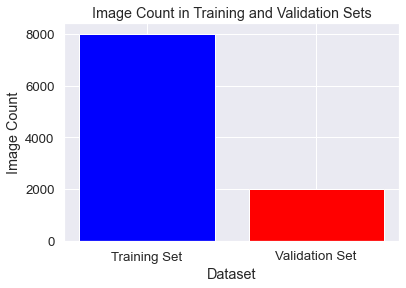

In [44]:
import matplotlib.pyplot as plt

# Assuming you have already loaded your training and validation sets
# using ImageDataGenerator and flow_from_directory.

# Get the counts of images in the training and validation sets
training_count = len(training_set.filenames)
validation_count = len(validation_set.filenames)

# Create labels for the sets
set_labels = ['Training Set', 'Validation Set']

# Create a list of image counts
image_counts = [training_count, validation_count]

# Create a bar plot
plt.bar(set_labels, image_counts, color=['blue', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Image Count')
plt.title('Image Count in Training and Validation Sets')
plt.show()


In [15]:
FAST_RUN = False
epochs=5 if FAST_RUN else 30

In [16]:
history = model.fit_generator(training_set, 
                              steps_per_epoch=8000//32, 
                              epochs=epochs,
                              validation_data=validation_set, 
                              validation_steps=2000//32,
                              callbacks=callbacks)

Epoch 1/30


C:\Users\LEGION\AppData\Local\Temp\ipykernel_31160\3544215541.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


250/250 [==============================] - 35s 135ms/step - loss: 0.8560 - accuracy: 0.5915 - val_loss: 0.8132 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 2/30
250/250 [==============================] - 32s 127ms/step - loss: 0.6652 - accuracy: 0.6289 - val_loss: 0.6166 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 3/30
250/250 [==============================] - 33s 130ms/step - loss: 0.5917 - accuracy: 0.6824 - val_loss: 0.6271 - val_accuracy: 0.6613 - lr: 0.0010
Epoch 4/30
250/250 [==============================] - ETA: 0s - loss: 0.5744 - accuracy: 0.6955
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
250/250 [==============================] - 32s 127ms/step - loss: 0.5744 - accuracy: 0.6955 - val_loss: 0.6962 - val_accuracy: 0.6038 - lr: 0.0010
Epoch 5/30
250/250 [==============================] - 32s 128ms/step - loss: 0.5320 - accuracy: 0.7347 - val_loss: 0.5403 - val_accuracy: 0.7268 - lr: 7.5000e-04
Epoch 6/30
250/250 [==============================] - 32

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

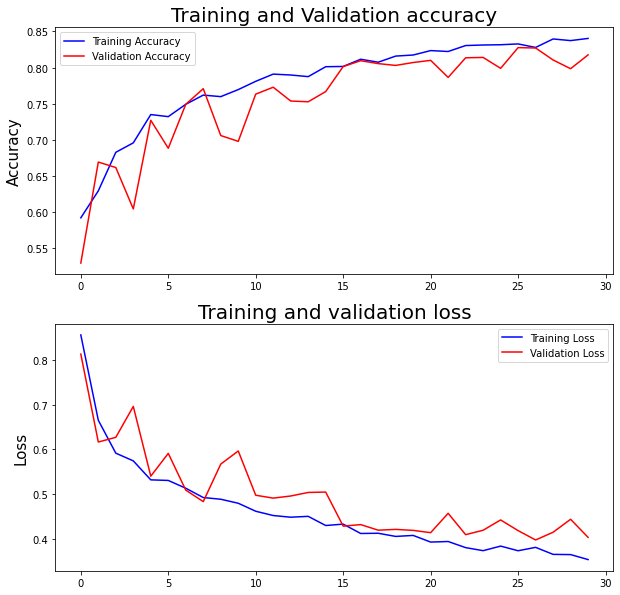

In [18]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()

plt.show()

In [43]:
print("Training Accuracy:",round(val_accuracy[-1]*100))
print("Accuracy Score:" , round(accuracy[-1]*100))

Training Accuracy: 82
Accuracy Score: 84


In [20]:
model.save('MODEL')

INFO:tensorflow:Assets written to: MODEL\assets


INFO:tensorflow:Assets written to: MODEL\assets


# Loding images

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from matplotlib import pyplot as plt

In [22]:
import cv2
import numpy as np

In [23]:
model = load_model('MODEL')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 32)        1

In [35]:
pred_datagen = ImageDataGenerator(rescale=1./255)
pred_set = pred_datagen.flow_from_directory('C:/Users/LEGION/Desktop/prediction',
                                             target_size=(64,64), 
                                             class_mode='categorical',
                                             shuffle = False)

Found 7 images belonging to 2 classes.


In [36]:
pred_prob = model.predict_generator(pred_set)
pred_prob = np.round(pred_prob*100,2)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_31160\3110469594.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_prob = model.predict_generator(pred_set)


In [37]:
print(pred_prob)

[[92.31  7.69]
 [95.86  4.14]
 [98.96  1.04]
 [94.51  5.49]
 [39.73 60.27]
 [12.9  87.1 ]
 [10.72 89.28]]


[[92.31  7.69]
 [95.86  4.14]
 [98.96  1.04]
 [94.51  5.49]
 [39.73 60.27]
 [12.9  87.1 ]
 [10.72 89.28]]


IndexError: index 7 is out of bounds for axis 0 with size 7

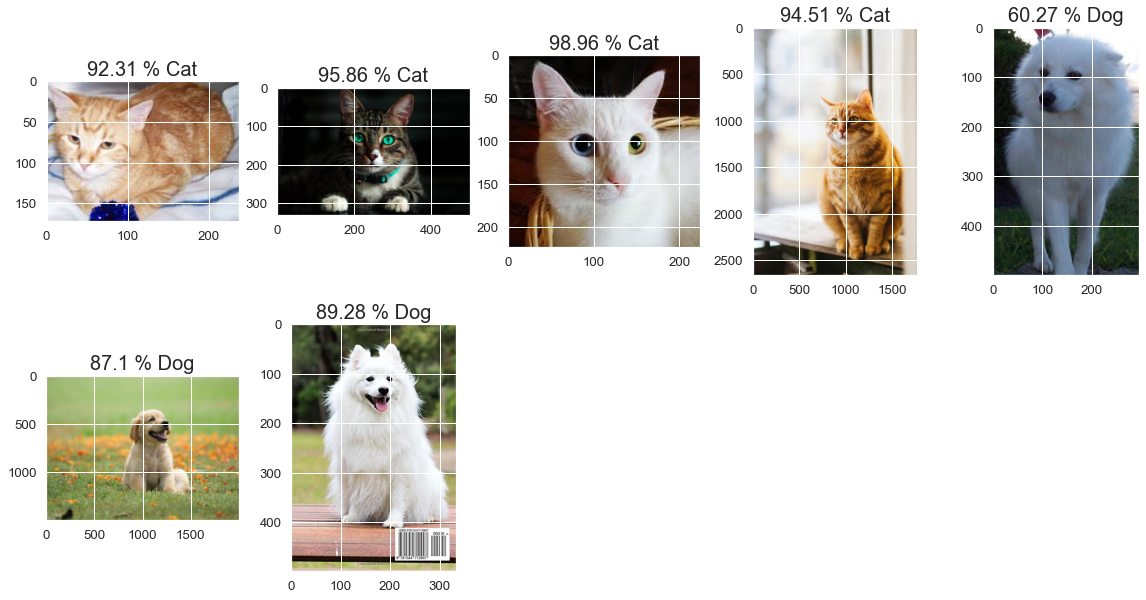

In [38]:
image1 = cv2.imread('C:/Users/LEGION/Desktop/prediction//cats/cat_sample_1.jpg')
image2 = cv2.imread('C:/Users/LEGION/Desktop/prediction/cats/cat_sample_2.jpg')
image3 = cv2.imread('C:/Users/LEGION/Desktop/prediction/cats/cat_sample_3.jpg')
image4=cv2.imread('C:/Users/LEGION/Desktop/prediction/cats/cat_sample_4.jpg')


image5 = cv2.imread('C:/Users/LEGION/Desktop/prediction/dogs/dog_sample_1.jpg')
image6 = cv2.imread('C:/Users/LEGION/Desktop/prediction/dogs/dog_sample_2.jpg')
image7 = cv2.imread('C:/Users/LEGION/Desktop/prediction/dogs/dog_sample_3.jpg')



sample1 = image1[:,:,::-1]
sample2 = image2[:,:,::-1]
sample3 = image3[:,:,::-1]


sample4= image4[:,:,::-1]
sample5= image5[:,:,::-1]
sample6 = image6[:,:,::-1]
sample7 = image7[:,:,::-1]


fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,5,1)
ax2 = fig.add_subplot(2,5,2)
ax3 = fig.add_subplot(2,5,3)
ax4 = fig.add_subplot(2,5,4)
ax5 = fig.add_subplot(2,5,5)
ax6 = fig.add_subplot(2,5,6)
ax7 = fig.add_subplot(2,5,7)


ax1.imshow(sample1)
ax2.imshow(sample2)
ax3.imshow(sample3)
ax4.imshow(sample4)
ax5.imshow(sample5)
ax6.imshow(sample6)
ax7.imshow(sample7)

#ax10.imshow(sample10)

axis = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
print(pred_prob)

for i in range(8):
    if pred_prob[i][0] > 50 :
        axis[i].set_title(str(pred_prob[i][0]) +' % Cat',fontsize =20)
    else:
        axis[i].set_title(str(pred_prob[i][1]) +' % Dog',fontsize =20)
    

    
    
plt.show()

# Confusion Matrix

63/63 [==============================] - 2s 31ms/step
Confusion Matrix:
[[517 483]
 [505 495]]


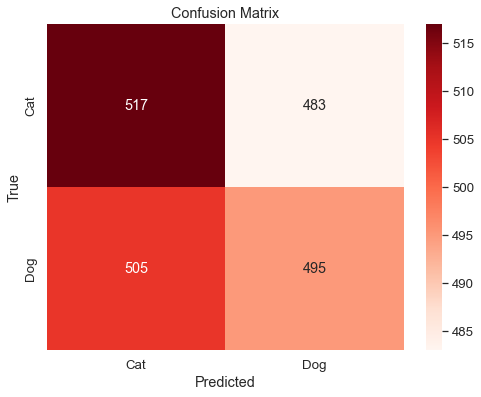

Training Accuracy: 82
Accuracy Score: 84


In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the validation set
validation_predictions = model.predict(validation_set)

# Convert predicted probabilities to class labels (0 or 1)
predicted_labels = np.argmax(validation_predictions, axis=1)

# Get true labels from the validation set
true_labels = validation_set.classes

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix (as described in the previous response)

# Set the class names for your labels
class_names = ['Cat', 'Dog']  # Replace with your class names

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Training Accuracy:",round(val_accuracy[-1]*100))
print("Accuracy Score:" , round(accuracy[-1]*100))


# Accuracy , Precision and Recall report

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.51
Precision: 0.51
Recall: 0.49
